In [101]:
# %pip install yfinance
# %pip install pandas
# %pip install pandas_datareader
# %pip install datetime
# %pip install numpy
# %pip install  matplotlib

In [102]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import datetime as dt
import numpy as np
import matplotlib

## Declare Data Ranges

In [103]:
endDate = dt.datetime.now()
print(endDate)

startDate = endDate - dt.timedelta(days = 365*5)
endDate, startDate

2025-01-29 10:29:42.375138


(datetime.datetime(2025, 1, 29, 10, 29, 42, 375138),
 datetime.datetime(2020, 1, 31, 10, 29, 42, 375138))

In [104]:
stocks = ['VTI', 'VXUS', 'SMH']

In [105]:
df = yf.download(stocks, start = startDate, end = endDate)

[*********************100%***********************]  3 of 3 completed


In [106]:
df.head()

Price           Close                              High              \
Ticker            SMH         VTI       VXUS        SMH         VTI   
Date                                                                  
2020-01-31  66.484352  151.550873  46.199993  68.417458  154.043976   
2020-02-03  67.392914  152.885468  46.285873  67.484738  153.691782   
2020-02-04  69.562820  155.295120  47.101673  69.625649  155.721456   
2020-02-05  70.944992  156.824341  47.531040  71.094807  156.954093   
2020-02-06  70.993317  157.259918  47.642670  71.060975  157.398947   

Price                        Low                              Open  \
Ticker           VXUS        SMH         VTI       VXUS        SMH   
Date                                                                 
2020-01-31  46.457613  66.189553  151.105997  45.950959  68.354630   
2020-02-03  46.517729  66.687334  152.283037  46.242934  66.774320   
2020-02-04  47.247660  68.852403  154.600018  47.067326  69.205193   
2020-02-05  47.677027  70.007434  155.860458  47.410818  70.800008   
2020-02-06  47.737131  70.166918  156.805794  47.591144  71.041647   

Price                                Volume                    
Ticker             VTI       VXUS       SMH      VTI     VXUS  
Date                                                           
2020-01-31  153.997633  46.440441  12204800  4525300  4732600  
2020-02-03  152.320117  46.294459   7682000  2783200  1828500  
2020-02-04  154.748310  47.110262  10815600  2732700  1460600  
2020-02-05  156.750195  47.634091  10793000  4133700  1922400  
2020-02-06  157.334064  47.702781   5421800  2202300  4498200

In [107]:
adj_close_prices = df['Close']

In [108]:
adj_close_prices.head()

Ticker,SMH,VTI,VXUS
Date,,,
2020-01-31,66.484352,151.550873,46.199993
2020-02-03,67.392914,152.885468,46.285873
2020-02-04,69.562820,155.295120,47.101673
2020-02-05,70.944992,156.824341,47.531040
2020-02-06,70.993317,157.259918,47.642670


## If you want to select multiple pieces of data to be selected in the data frame add []

In [109]:
open_close_prices = df[['Open', 'Close']]

In [110]:
open_close_prices.head()

Price            Open                             Close                       
Ticker            SMH         VTI       VXUS        SMH         VTI       VXUS
Date                                                                          
2020-01-31  68.354630  153.997633  46.440441  66.484352  151.550873  46.199993
2020-02-03  66.774320  152.320117  46.294459  67.392914  152.885468  46.285873
2020-02-04  69.205193  154.748310  47.110262  69.562820  155.295120  47.101673
2020-02-05  70.800008  156.750195  47.634091  70.944992  156.824341  47.531040
2020-02-06  71.041647  157.334064  47.702781  70.993317  157.259918  47.642670

## Calculate Daily Returns

In [111]:
log_return = np.log(adj_close_prices/adj_close_prices.shift(1))
log_return.head()

Ticker,SMH,VTI,VXUS
Date,,,
2020-01-31,NaN,NaN,NaN
2020-02-03,0.013573,0.008768,0.001857
2020-02-04,0.031690,0.015638,0.017472
2020-02-05,0.019675,0.009799,0.009074
2020-02-06,0.000681,0.002774,0.002346


In [112]:
cumulative_log_returns = log_return.cumsum()

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

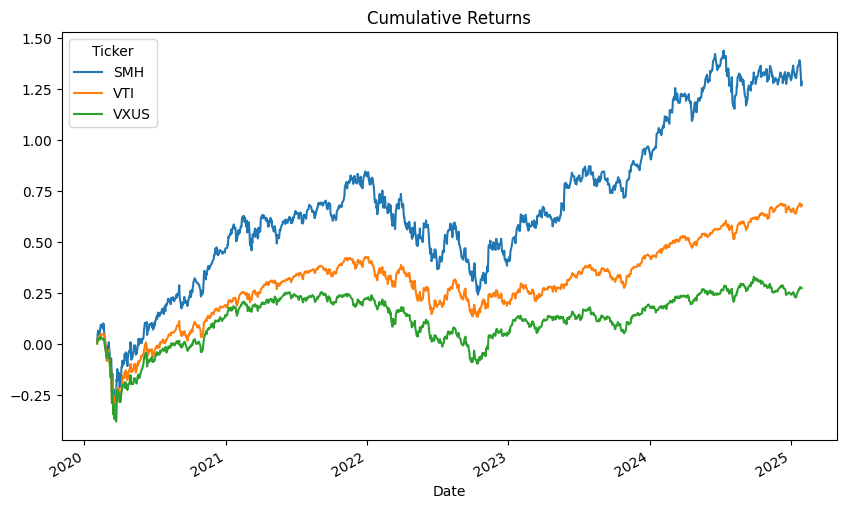

In [113]:
cumulative_log_returns.plot(title = "Cumulative Returns", figsize = (10,6))